<a href="https://colab.research.google.com/github/ayanban011/Algo_and_DS/blob/main/Graph_Maker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
def read_data():
    # Data obtained from this folder (.csv and .txt file with same name should be present)
    fldr = 'Data/'
    files = list()
    for fname in os.listdir(fldr):
        files.append(fname)
    labels = list()
    for i in files:
        if i[-3:]=='txt':
            labels.append(dict())
            mdat = open(fldr+i, 'r')
            labels[-1]['Name'] = i[:-4]+'.csv'
            for line in mdat:
                if line[0].isalpha() and line[-2].isnumeric():
                    line = line.split()
                    labels[-1][line[0][:-1]] = int(line[1])
    data = list()
    count = 0
    for i in labels:
        fname = i.get('Name')
        cols = 0
        for j in i.values():
            if type(j) is int:
                cols += int(j)
        data.append(pd.read_csv(fldr+fname, usecols=range(1,cols+1)))
        print(count,'\t',fname,data[-1].shape)
        count += 1
    return data

In [ ]:
def create_corr_matrix(dataframe):
    dataframe = dataframe.transpose()
    result = dataframe.corr()
    return result

In [ ]:
def create_adj_matrix(matrix):
    matrix = matrix.to_numpy()
    norm_mat = (matrix-np.min(matrix))/np.ptp(matrix)
    rnd_mat = np.rint(norm_mat)
    rnd_mat = rnd_mat.astype('int')
    adj_mat = pd.DataFrame(rnd_mat)
    return adj_mat

In [ ]:
def make_graph(adj_mat):
    adj_mat = adj_mat.to_numpy()
    G = nx.from_numpy_matrix(adj_mat)
    return G

In [ ]:
# List of data files successfully read
data = read_data()

0 	 AML-ALL.csv (537, 72)
1 	 colonTumor.csv (233, 62)
2 	 DLBCL.csv (728, 77)
3 	 lungCancer.csv (764, 181)
4 	 prostateCancer.csv (736, 136)


In [ ]:
#for i in range(len(data)):
matrix = create_corr_matrix(data[0]) # Choose a file from the list above
adj_mat = create_adj_matrix(matrix)
#adj_mat.to_csv('Adjacency Matrices/'+str(i)+'_after.csv')
#print('Done',i)

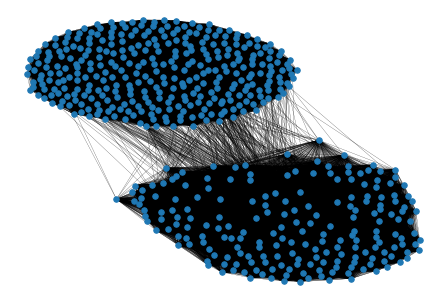

In [ ]:
graph = make_graph(adj_mat)
# Increase k to move the nodes away from each other
# Change s to get a different look
pos = nx.spring_layout(graph, k=1.2, seed=2)
# new_pos = []
# for i in pos.values():
#     new_pos.append([i[0]+5, i[1]+5])
# new_pos = (new_pos - np.min(new_pos))/np.ptp(new_pos)
nx.draw(graph, pos=pos ,node_size=30, width=0.2)
# Change save location and plot name for every graph
fldr = 'Graphs/'
plt_name = 'aml_org.png'
plt.savefig(fldr+plt_name, format='PNG', dpi=240)

In [ ]:
#np.save('neural-combinatorial-optimization-rl-tensorflow-master/Self_Net_TSP/Node_Positions/prostate_list', new_pos)